In [36]:
import delegator

In [ ]:
# The first thing as in any problem is we have to get data
# I used kenpom
# I wasn't able to get through the auth with requests -- so I shell drop into curl commands
# I got the curl commands from Chrome Developer tools while loading the webpage

In [37]:
def get_html(url, cookie):
    try:
        template = "curl '{url}' -H 'pragma: no-cache' -H 'cookie: PHPSESSID={cookie}' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed"
        cmd = template.format(url=url, cookie=cookie)
        print(cmd)
        c = delegator.run(cmd)
        c.block()
        content = c.out
        return content
    except Exception as e:
        print(e)
        return None
get_html(url='https://kenpom.com/team.php?team=Virginia&y=2017', cookie='')

curl 'https://kenpom.com/team.php?team=Virginia&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed


'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"\n"http://www.w3.org/TR/html4/loose.dtd">\n<HTML>\n<HEAD>\n<meta name="viewport" content="width=device-width, initial-scale=1"><LINK REL=stylesheet TYPE="text/css" HREF="css/team.css?1451706912">\n<TITLE>2017 scouting report for Virginia</TITLE>\n<script type="text/javascript" src="https://code.jquery.com/jquery-1.10.2.min.js"></script>\n \n<!-- try to use css link for google fonts --> \n<link rel="stylesheet" type="text/css" href="https://fonts.googleapis.com/css?family=Signika:600,400|Open+Sans+Condensed:300,700&text=1234567890ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz:%c3%97%C3%A9%c2%b7%C2%A9%20%26%2B%2D%2C%2E%25%27%28%29%2a%7C%95%3F" />\n<link rel="Shortcut Icon" type="image/ico" href="assets/favicon.ico" />\n<LINK REL=stylesheet TYPE="text/css" HREF="css/master.css?1518230499">\n\n\n<script type="text/javascript">\n    (function(i,s,o,g,r,a,m){i[\'GoogleAnalyticsObject\']=r;i[r]=i[r]||function(){\n           

In [40]:
index_page = requests.get('https://kenpom.com/').content

In [42]:
import re
import time

In [54]:
all_teams = re.findall('team.php.team=.*?"', str(index_page))[:-1]
all_teams = [x[:-1] for x in all_teams] # remove the " at the end I matched

In [73]:
for team in all_teams:
    team_str = team[9:]
    team_name = team_str[5:]
    url = 'https://kenpom.com/%s' % team
    html = get_html(url, cookie)
    with open('raw_data/%s.html' % team_name, 'w') as fout:
        fout.write(html)
    time.sleep(2)

curl 'https://kenpom.com/team.php?team=Virginia' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Villanova' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml

curl 'https://kenpom.com/team.php?team=Tennessee' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Ohio+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml

curl 'https://kenpom.com/team.php?team=Texas+A%26M' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Notre+Dame' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application

curl 'https://kenpom.com/team.php?team=UCLA' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Arizona+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q

curl 'https://kenpom.com/team.php?team=San+Diego+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Murray+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,applicati

curl 'https://kenpom.com/team.php?team=BYU' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Boston+College' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml

curl 'https://kenpom.com/team.php?team=SMU' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Temple' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,i

curl 'https://kenpom.com/team.php?team=DePaul' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=UCF' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,i

curl 'https://kenpom.com/team.php?team=Wyoming' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Grand+Canyon' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/x

curl 'https://kenpom.com/team.php?team=Bradley' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Canisius' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q

curl 'https://kenpom.com/team.php?team=VCU' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Indiana+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=

curl 'https://kenpom.com/team.php?team=Fort+Wayne' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Wofford' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml

curl 'https://kenpom.com/team.php?team=William+%26+Mary' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=North+Dakota+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,

curl 'https://kenpom.com/team.php?team=Western+Michigan' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Long+Beach+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,ap

curl 'https://kenpom.com/team.php?team=Niagara' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Duquesne' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q

curl 'https://kenpom.com/team.php?team=Kent+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=George+Mason' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/

curl 'https://kenpom.com/team.php?team=Pittsburgh' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Campbell' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xm

curl 'https://kenpom.com/team.php?team=California' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Florida+Atlantic' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,applic

curl 'https://kenpom.com/team.php?team=Southeast+Missouri+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Cornell' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,app

curl 'https://kenpom.com/team.php?team=Montana+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Brown' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;

curl 'https://kenpom.com/team.php?team=New+Hampshire' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=North+Florida' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,applic

curl 'https://kenpom.com/team.php?team=Samford' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=San+Jose+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/x

curl 'https://kenpom.com/team.php?team=Texas+A%26M+Corpus+Chris' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Kennesaw+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+

curl 'https://kenpom.com/team.php?team=Youngstown+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Southern' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,applicatio

curl 'https://kenpom.com/team.php?team=Alabama+St.' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Longwood' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/x

In [72]:
all_teams[0]

'team.php?team=Virginia'

In [59]:
html_files = os.listdir('raw_data')

'/home/leswing/Documents/March-Madness/2018'

In [45]:
keywords = [
    'RankAdjOE',
    'RankAdjDE',
    'RankAdjTempo',
    'RankAPL_Off',
    'RankAPL_Def',
    'RankeFG_Pct',
    'RankDeFG_Pct',
    'RankTO_Pct',
    'RankDTO_Pct',
    'RankOR_Pct',
    'RankDOR_Pct',
    'RankFT_Rate',
    'RankDFT_Rate',
    'RankDFT_Rate',
    'RankFG3Pct',
    'RankFG3Pct&od=d',
    'RankFG2Pct',
    'RankFG2Pct&od=d',
    'RankFTPct',
    'RankFTPct&od=d',
    'RankBlockPct',
    'RankBlockPct&od=d',
    'RankStlRate',
    'RankStlRate&od=d',
    'RankF3GRate',
    'RankF3GRate&od=d',
    'RankARate',
    'RankARate&od=d',
    'RankOff_3',
    'RankDef_3',
    'RankOff_2',
    'RankDef_2',
    'RankOff_1',
    'RankDef_1',
    'RankSOSO',
    'RankSOSD',
    'ExpRank',
    'SizeRank',
]

def get_feature_vector(html_str):
    fv = []
    for keyword in keywords:
        pattern = '%s.*>(\d+\.\d+)' % keyword
        val = re.findall(pattern, html_str)[-1]
        fv.append(float(val))
    return fv

def score_to_diff(s, neg=False):
    s = [float(x) for x in s.split('-')]
    v = abs(s[0] - s[1])
    if neg:
        return -1 * v
    return v

def get_wins_losses(html_str):
    pat = 'team.php.*?=(.*?)".*>W<.* (\d+-\d+).*\n'
    wins = re.findall(pat, html_str)
    wins = [(x[0], score_to_diff(x[1])) for x in wins]
    
    pat = 'team.php.*?=(.*?)".*>L<.* (\d+-\d+).*\n'
    losses = re.findall(pat, html_str)
    losses = [(x[0], score_to_diff(x[1], True)) for x in losses]
    return wins + losses

def parse_html_file(html_str):
    """
    return feature_vector, list of (oppenent, +- score)
    """
    fv = get_feature_vector(html_str)
    wl = get_wins_losses(html_str)
    return fv, wl


In [188]:
html_files = os.listdir('raw_data')
d = {}
for html_file in html_files:
    html_str = open('raw_data/%s' % html_file).read()
    team_name = html_file[:-5]
    d[team_name] = parse_html_file(html_str)

In [189]:
import deepchem as dc
X = []
ys = []
for k, v in d.items():
    my_fv = v[0]
    oppenents = v[1]
    for opp in oppenents:
        their_fv = d[opp[0]][0]
        fv = my_fv + their_fv
        y = opp[1]
        X.append(fv)
        ys.append(y)
dc.data.DiskDataset.from_numpy(X, ys, None, None, data_dir='datasets/raw_ds_2018')

TIMING: dataset construction took 1.717 s
Loading dataset from disk.


In [ ]:
# Now we have a DeepChem DiskDataset, with this we have to do the feature engineering
# In order to make it easy for the model to learn

In [3]:
def to_numpy(ds):
    return dc.data.NumpyDataset(ds.X, ds.y, ds.w, ds.ids)

In [192]:
ds = to_numpy(dc.data.DiskDataset('datasets/raw_ds_2018'))

Loading dataset from disk.


In [ ]:
# Lets normalize all variables to have a mean of 0 and a std of 1

In [193]:
transformers = [
    dc.trans.NormalizationTransformer(transform_X=True, dataset=ds),
    dc.trans.NormalizationTransformer(transform_y=True, dataset=ds)
]
for trans in transformers:
    ds = trans.transform(ds)

In [ ]:
# These normalization params are important if we need to do inference later
# So lets save them

In [218]:
import pickle

In [222]:
pickle.dump(transformers, open('transformers.pkl', 'wb'))

In [194]:
import numpy as np

In [ ]:
# Lets do a visual inspection of the features to see if they are relatively normal or if we have to clip

In [207]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import savefig
from matplotlib.pyplot import clf

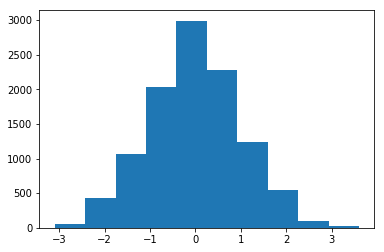

In [208]:
for i in range(ds.X.shape[-1]):
    clf()
    plt.hist(ds.X[:,i])
    savefig('img/%s.png' % i)

(array([   8.,   55.,  342., 1464., 3511., 3511., 1464.,  342.,   55.,
           8.]),
 array([-4.49386641, -3.59509313, -2.69631985, -1.79754657, -0.89877328,
         0.        ,  0.89877328,  1.79754657,  2.69631985,  3.59509313,
         4.49386641]),
 <a list of 10 Patch objects>)

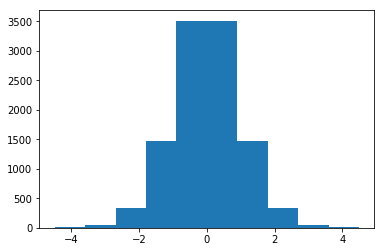

In [209]:
plt.hist(ds.y)

In [ ]:
# Seems like clipping is not neccessary yet

In [ ]:
# I like 5 folds of data.  Random Split is bad we should do time or team split
# This will lead to overpredicting our real world perf

In [214]:
splitter = dc.splits.RandomSplitter()
folds = splitter.k_fold_split(ds, 5)

TIMING: dataset construction took 0.164 s
Loading dataset from disk.
TIMING: dataset construction took 0.089 s
Loading dataset from disk.
TIMING: dataset construction took 0.173 s
Loading dataset from disk.
TIMING: dataset construction took 0.282 s
Loading dataset from disk.
TIMING: dataset construction took 0.090 s
Loading dataset from disk.
TIMING: dataset construction took 0.081 s
Loading dataset from disk.
TIMING: dataset construction took 0.146 s
Loading dataset from disk.
TIMING: dataset construction took 0.320 s
Loading dataset from disk.
TIMING: dataset construction took 0.192 s
Loading dataset from disk.
TIMING: dataset construction took 0.074 s
Loading dataset from disk.
TIMING: dataset construction took 0.095 s
Loading dataset from disk.
TIMING: dataset construction took 0.333 s
Loading dataset from disk.
TIMING: dataset construction took 0.271 s
Loading dataset from disk.
TIMING: dataset construction took 0.059 s
Loading dataset from disk.
TIMING: dataset construction took 

In [ ]:
# Lets make sure we save these folds to disk in case we want them later

In [224]:
for i, fold in enumerate(folds):
    train, valid = fold
    train_folder = 'datasets/2018_folds/train%s' % i
    dc.data.DiskDataset.from_numpy(train.X, train.y, train.w, train.ids, data_dir=train_folder)
    
    valid_folder = 'datasets/2018_folds/valid%s' % i
    dc.data.DiskDataset.from_numpy(valid.X, valid.y, valid.w, valid.ids, data_dir=valid_folder)

TIMING: dataset construction took 0.111 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.124 s
Loading dataset from disk.
TIMING: dataset construction took 0.039 s
Loading dataset from disk.
TIMING: dataset construction took 0.142 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.
TIMING: dataset construction took 0.134 s
Loading dataset from disk.
TIMING: dataset construction took 0.034 s
Loading dataset from disk.
TIMING: dataset construction took 0.144 s
Loading dataset from disk.
TIMING: dataset construction took 0.036 s
Loading dataset from disk.


In [ ]:
# Now to train a dummy model to see vaguely how well we are going

In [225]:
model = dc.models.MultiTaskRegressor(1, ds.X.shape[-1])

In [228]:
train, valid = to_numpy(train), to_numpy(valid)

In [231]:
model.fit(train, nb_epoch=10)

53.03380276372507

In [15]:
from sklearn.metrics import r2_score
def p_r2(y_true, y_pred):
    return r2_score(y_true, y_pred)

In [240]:
print(p_r2(valid.y, np.squeeze(y_pred)))


0.49155605833580185


In [ ]:
# pearson r^2 of 0.5 is nothing to sneeze at there is signal

In [236]:
np.squeeze(y_pred).shape

(2152,)

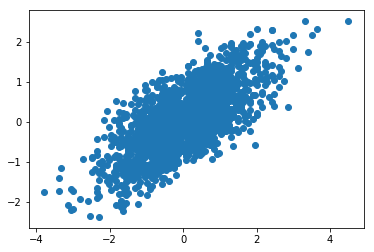

In [242]:
plt.scatter(valid.y, np.squeeze(y_pred))

In [ ]:
# Scatter plot agrees that we have signal.  But the vertical band is still quite wide
# More important than determining score difference is how many games we call correct

In [74]:
def p_correct_cat(y_true, y_pred):
    n_correct = 0
    for yt, yp in zip(y_true, y_pred):
        if yt * yp > 0:
            n_correct += 1
    return n_correct / len(y_true)
        

In [250]:
p_correct_cat(valid.y, np.squeeze(y_pred))

0.7407063197026023

In [ ]:
# We call 74% of games correctly on the hold out set.  Is this good?  
#Lets try against a simpler model

In [256]:
# So we can predict 74% of the games right on a random holdout
# How well does just picking the higher ranked team according to kenpom do?

team_rankings = [x[14:] for x in all_teams]
num_right = 0
num_wrong = 0
for k, v in d.items():
    my_ranking = team_rankings.index(k)
    for game in v[1]:
        other_team_ranking = team_rankings.index(game[0])
        if my_ranking < other_team_ranking:
            sign = 1
        else:
            sign = -1
        if game[1] * sign > 0:
            num_right += 1
        else:
            num_wrong += 1
num_right, num_wrong, num_right / (num_right + num_wrong)
    

(8024, 2736, 0.745724907063197)

In [257]:
# So our unoptimized Neural Network is doing as well as the benchmark model of picking the higher ranked team
# What happens now that we hyper parameter smash?

In [18]:
# will create a list of hparams and then lay out models in
# models/{key}/{fold_id}
def eval_hprams(model, epochs, train_ds, valid_ds):
    model.fit(train_ds, nb_epoch=epochs)
    model.save()
    y_pred = model.predict(valid_ds)
    return p_r2(valid_ds.y, np.squeeze(y_pred))

def eval_model(hps, key, folds):
    vals = []
    layer_sizes, dropout, epochs = hps[key]['layer_sizes'], hps[key]['dropout'], hps[key]['epochs']
    for i, fold in enumerate(folds):
        train, valid = fold
        model_path = 'models/%s/%s' % (key, i)
        model = dc.models.MultiTaskRegressor(1, n_features=train.X.shape[-1],
                                             layer_sizes=layer_sizes, dropout=dropout,
                                            model_dir=model_path)
        retval = eval_hprams(model, epochs, train, valid)
        vals.append(retval)
    return np.mean(vals), np.std(vals)



    

In [4]:
import deepchem as dc
folds = [
    (dc.data.DiskDataset(data_dir='datasets/2018_folds/train%s' % x),
     dc.data.DiskDataset(data_dir='datasets/2018_folds/valid%s' % x)
    ) for x in range(5)
]
folds = [(to_numpy(x[0]), to_numpy(x[1])) for x in folds]

Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.
Loading dataset from disk.


In [5]:
import itertools
hps = {}
layer_sizes = [
    [1000],
    [64, 64],
    [64, 32],
    [64, 32, 16],
    [256, 128]
]

dropouts = [
    0.25, 0.35, 0.5, 0.0
]

epochs = [
    25, 50, 100
]
index = 0
for ls, dr, ep in itertools.product(layer_sizes, dropouts, epochs):
    hps[index] = {
        'layer_sizes': ls,
        'dropout': dr,
        'epochs': ep
    }
    index += 1


In [63]:
import random
import numpy as np
key_order = list(hps.keys())
random.shuffle(key_order)
print(key_order)

for key in key_order:
    retval = eval_model(hps, key, folds)
    print(key, retval)
    with open('metrics/results.txt', 'a') as fout:
        fout.write("%s,%s,%s\n" % (key, retval[0], retval[1]))

[1, 52, 12, 36, 22, 10, 56, 44, 2, 31, 28, 39, 30, 19, 37, 41, 34, 21, 29, 58, 35, 24, 40, 59, 4, 8, 51, 46, 45, 0, 42, 57, 11, 3, 55, 15, 5, 38, 23, 7, 27, 20, 48, 54, 33, 25, 43, 13, 14, 50, 47, 49, 32, 26, 16, 9, 6, 53, 18, 17]
1 (0.4778264296121547, 0.018910465885460387)
52 (0.48813049632757444, 0.009374839244619123)
12 (0.4901801991047637, 0.008847250122518219)
36 (0.4676948336007644, 0.016166062783935137)
22 (0.48788933662585643, 0.0072127106233639375)
10 (0.45143257148564986, 0.05527994287950668)
56 (0.4606001978016375, 0.009156299969677182)
44 (0.47010975550152756, 0.012210980331862503)
2 (0.4636537463603435, 0.030803736996908464)


KeyboardInterrupt: 

In [26]:
import json
with open('metrics/hps_0.json', 'w') as fout:
    fout.write(json.dumps(hps))

In [68]:
results = [x.strip().split(',') for x in open('metrics/results.txt').readlines()]
results = [[x[0], float(x[1]), float(x[2])] for x in results]
results = sorted(results, key=lambda x: x[1] - 1.96 * x[2], reverse=True)
results[:5]

[['22', 0.48788933662585643, 0.0072127106233639375],
 ['12', 0.4901801991047637, 0.008847250122518219],
 ['52', 0.48813049632757444, 0.009374839244619123],
 ['44', 0.47010975550152756, 0.012210980331862503],
 ['56', 0.4606001978016375, 0.009156299969677182]]

In [106]:
for result in results[:5]:
    print(result[0], hps[float(result[0])])
    

22 {'epochs': 50, 'layer_sizes': [64, 64], 'dropout': 0.0}
12 {'epochs': 25, 'layer_sizes': [64, 64], 'dropout': 0.25}
52 {'epochs': 50, 'layer_sizes': [256, 128], 'dropout': 0.35}
44 {'epochs': 100, 'layer_sizes': [64, 32, 16], 'dropout': 0.5}
56 {'epochs': 100, 'layer_sizes': [256, 128], 'dropout': 0.5}


In [40]:
# Now I don't suspect this is much better than our un-smashed model from the validation scores
# But since we don't have holdout data yet lets go back in time and see if we can get 2017 data
import requests
import re
index_page = requests.get('https://kenpom.com/index.php?y=2017').content
all_teams = re.findall('team.php.team=.*?"', str(index_page))[:-1]
all_teams = [x[:-1] for x in all_teams] # remove the " at the end I matched

In [44]:
import time
cookie=''
for team in all_teams:
    team_str = team[9:]
    team_name = team_str[5:]
    url = 'https://kenpom.com/%s' % team
    html = get_html(url, cookie)
    with open('raw_data/%s_2017.html' % team_name, 'w') as fout:
        fout.write(html)
    time.sleep(2)

curl 'https://kenpom.com/team.php?team=Gonzaga&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Villanova&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,ap

curl 'https://kenpom.com/team.php?team=Saint+Mary%27s&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=UCLA&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,

curl 'https://kenpom.com/team.php?team=TCU&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Kansas+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,appli

curl 'https://kenpom.com/team.php?team=Middle+Tennessee&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Indiana&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml

curl 'https://kenpom.com/team.php?team=Tennessee&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Princeton&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,

curl 'https://kenpom.com/team.php?team=Iowa&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Colorado&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,applic

curl 'https://kenpom.com/team.php?team=Davidson&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Colorado+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xm

curl 'https://kenpom.com/team.php?team=St.+John%27s&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Akron&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,a

curl 'https://kenpom.com/team.php?team=Winthrop&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Chattanooga&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml

curl 'https://kenpom.com/team.php?team=Wyoming&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Toledo&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,appli

curl 'https://kenpom.com/team.php?team=Kent+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Wofford&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,app

curl 'https://kenpom.com/team.php?team=Rice&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Missouri&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,applic

curl 'https://kenpom.com/team.php?team=Northern+Iowa&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Siena&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,

curl 'https://kenpom.com/team.php?team=DePaul&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Saint+Joseph%27s&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+

curl 'https://kenpom.com/team.php?team=Murray+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=IUPUI&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,app

curl 'https://kenpom.com/team.php?team=Liberty&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Texas+Southern&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+x

curl 'https://kenpom.com/team.php?team=Long+Beach+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Lamar&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml

curl 'https://kenpom.com/team.php?team=Portland+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Montana+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml

curl 'https://kenpom.com/team.php?team=LIU+Brooklyn&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=St.+Francis+PA&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xh

curl 'https://kenpom.com/team.php?team=Fairleigh+Dickinson&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Colgate&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xh

curl 'https://kenpom.com/team.php?team=Bryant&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Youngstown+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xm

curl 'https://kenpom.com/team.php?team=UMass+Lowell&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Radford&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml

curl 'https://kenpom.com/team.php?team=Charleston+Southern&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Hampton&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xh

curl 'https://kenpom.com/team.php?team=Northern+Arizona&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Morgan+St.&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xh

curl 'https://kenpom.com/team.php?team=Maine&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed
curl 'https://kenpom.com/team.php?team=Howard&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,applica

curl 'https://kenpom.com/team.php?team=Alabama+A%26M&y=2017' -H 'pragma: no-cache' -H 'cookie: PHPSESSID=2c4da2mpbqelrbv23uro8sjbd7' -H 'accept-encoding: gzip, deflate, br' -H 'accept-language: en-US,en;q=0.9' -H 'upgrade-insecure-requests: 1' -H 'user-agent: Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/64.0.3282.186 Safari/537.36' -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' -H 'cache-control: no-cache' -H 'authority: kenpom.com' -H 'referer: https://kenpom.com/opptracker.php?team=Virginia' --compressed


In [57]:
keywords = [
    'RankAdjOE',
    'RankAdjDE',
    'RankAdjTempo',
    'RankAPL_Off',
    'RankAPL_Def',
    'RankeFG_Pct',
    'RankDeFG_Pct',
    'RankTO_Pct',
    'RankDTO_Pct',
    'RankOR_Pct',
    'RankDOR_Pct',
    'RankFT_Rate',
    'RankDFT_Rate',
    'RankDFT_Rate',
    'RankFG3Pct',
    'RankFG3Pct.*?&od=d',
    'RankFG2Pct',
    'RankFG2Pct.*?&od=d',
    'RankFTPct',
    'RankFTPct.*?&od=d',
    'RankBlockPct',
    'RankBlockPct.*?&od=d',
    'RankStlRate',
    'RankStlRate.*?&od=d',
    'RankF3GRate',
    'RankF3GRate.*?&od=d',
    'RankARate',
    'RankARate.*?&od=d',
    'RankOff_3',
    'RankDef_3',
    'RankOff_2',
    'RankDef_2',
    'RankOff_1',
    'RankDef_1',
    'RankSOSO',
    'RankSOSD',
    'ExpRank',
    'SizeRank',
]

def get_feature_vector(html_str):
    fv = []
    for keyword in keywords:
        pattern = '%s.*>(\d+\.\d+)' % keyword
        val = re.findall(pattern, html_str)[-1]
        fv.append(float(val))
    return fv

def score_to_diff(s, neg=False):
    s = [float(x) for x in s.split('-')]
    v = abs(s[0] - s[1])
    if neg:
        return -1 * v
    return v

def get_wins_losses(html_str):
    pat = 'team.php.*?=(.*?)".*>W<.* (\d+-\d+).*\n'
    wins = re.findall(pat, html_str)
    wins = [(x[0], score_to_diff(x[1])) for x in wins]
    
    pat = 'team.php.*?=(.*?)".*>L<.* (\d+-\d+).*\n'
    losses = re.findall(pat, html_str)
    losses = [(x[0], score_to_diff(x[1], True)) for x in losses]
    return wins + losses

def parse_html_file(html_str):
    """
    return feature_vector, list of (oppenent, +- score)
    """
    fv = get_feature_vector(html_str)
    wl = get_wins_losses(html_str)
    return fv, wl

In [58]:
import os
html_files = os.listdir('raw_data')
html_files = list(filter(lambda x: x.find('2017') > 0, html_files))
d = {}
for html_file in html_files:
    html_str = open('raw_data/%s' % html_file).read()
    team_name = html_file.split('&y')[0]
    d[team_name] = parse_html_file(html_str)

In [61]:
import deepchem as dc
X = []
ys = []
for k, v in d.items():
    my_fv = v[0]
    oppenents = v[1]
    for opp in oppenents:
        opp_name = opp[0].split('&y')[0]
        their_fv = d[opp_name][0]
        fv = my_fv + their_fv
        y = opp[1]
        X.append(fv)
        ys.append(y)
dc.data.DiskDataset.from_numpy(X, ys, None, None, data_dir='datasets/raw_ds_2017')

TIMING: dataset construction took 1.872 s
Loading dataset from disk.


In [94]:
# Now we can predict over the entire 2017 season based on the model learned from 2018
def predict(keys, ds):
    retval = None
    for key in keys:
        for fold in range(5):
            model_dir = 'models/%s/%s' % (key, 0)
            model = dc.models.TensorGraph.load_from_dir(model_dir)
            y_pred = model.predict(ds)
            y_pred = np.reshape(y_pred, newshape=(y_pred.shape[0], 1))
            if retval is None:
                retval = y_pred
            else:
                retval = np.concatenate([retval, y_pred], axis=1)
    return retval

def max_min_ensemble(y_pred):
  results = []
  for row in range(y_pred.shape[0]):
    r_dat = y_pred[row, :].tolist()
    r_dat.remove(max(r_dat))
    r_dat.remove(min(r_dat))
    mean = np.mean(r_dat)
    std = np.std(r_dat)
    results.append((mean, std))
  return np.array(results)



In [65]:
import pickle
transformers = pickle.load(open('transformers.pkl', 'rb'))

In [67]:
test2017 = ds
for trans in transformers:
    test2017 = trans.transform(test2017)

TIMING: dataset construction took 1.254 s
Loading dataset from disk.
TIMING: dataset construction took 0.196 s
Loading dataset from disk.


In [110]:
y_pred = max_min_ensemble(predict([22, 12,52], test2017))[:,0]
pr2 = p_r2(test2017.y, np.squeeze(y_pred))
acc = p_correct_cat(test2017.y, np.squeeze(y_pred))
print(pr2, acc)

INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/12/0/model-2175
INFO:tensorflow:Restoring parameters from models/12/0/model-2175
INFO:tensorflow:Restoring parameters from models/12/0/model-2175
INFO:tensorflow:Restoring parameters from models/12/0/model-2175
INFO:tensorflow:Restoring parameters from models/12/0/model-2175
INFO:tensorflow:Restoring parameters from models/52/0/model-4350
INFO:tensorflow:Restoring parameters from models/52/0/model-4350
INFO:tensorflow:Restoring parameters from models/52/0/model-4350
INFO:tensorflow:Restoring parameters from models/52/0/model-4350
INFO:tensorflow:Restoring parameters from models/52/0/model-4350
0.5219028441504814 0.7459

In [111]:
y_pred = max_min_ensemble(predict([22], test2017))[:,0]
pr2 = p_r2(test2017.y, np.squeeze(y_pred))
acc = p_correct_cat(test2017.y, np.squeeze(y_pred))
print(pr2, acc)

INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
0.5237718097254392 0.7442379182156134


In [109]:
# Ensembling seems to have little effect.  It looks like the model is pretty robust to hyper params
# This makes me want to retrain on 2017 and 2018 with a single set of hyper params for my final model

In [124]:
# Before I do that lets backtest 2017 march madness trained on 2018 data
bracket = [
    'Villanova',
    'Mount+St.+Mary%27s',
    'Wisconsin',
    'Virginia+Tech',
    'Virginia',
    'UNC+Wilmington',
    'Florida',
    'East+Tennessee+St.',
    'SMU',
    'USC',
    'Baylor',
    'New+Mexico+St.',
    'South+Carolina',
    'Marquette',
    'Duke',
    'Troy',
    
    'Gonzaga',
    'South+Dakota+St.',
    'Northwestern',
    'Vanderbilt',
    'Notre+Dame',
    'Princeton',
    'West+Virginia',
    'Bucknell',
    'Maryland',
    'Xavier',
    'Florida+St.',
    'Florida+Gulf+Coast',
    'Saint+Mary%27s',
    'VCU',
    'Arizona',
    'North+Dakota',
    
    'Kansas',
    'UC+Davis',
    'Miami+FL',
    'Michigan+St.',
    'Iowa+St.',
    'Nevada',
    'Purdue',
    'Vermont',
    'Creighton',
    'Rhode+Island',
    'Oregon',
    'Iona',
    'Michigan',
    'Oklahoma+St.',
    'Louisville',
    'Jacksonville+St.',
    
    'North+Carolina',
    'Texas+Southern',
    'Arkansas',
    'Seton+Hall',
    'Minnesota',
    'Middle+Tennessee',
    'Butler',
    'Winthrop',
    'Cincinnati',
    'Kansas+St.',
    'UCLA',
    'Kent+St.',
    'Dayton',
    'Wichita+St.',
    'Kentucky',
    'Northern+Kentucky'
]
for team in bracket:
    if team not in d:
        print(team)

In [128]:
def play_game(t1, t2):
    fv1 = d[t1][0]
    fv2 = d[t2][0]
    g1 = fv1 + fv2
    g2 = fv2 + fv1
    ds = dc.data.NumpyDataset(np.array([g1,g2]))
    for trans in transformers:
        ds = trans.transform(ds)
    y_pred = max_min_ensemble(predict([22], ds))[:,0]
    final_score = y_pred[0] + -1 * y_pred[1]
    print(final_score)
    if final_score > 0:
        return t1, abs(final_score)
    return t2, abs(final_score)

def play_tourney(bracket):
    teams_left = bracket
    all_winners, all_scores = list(), list()
    while len(teams_left) > 1:
        print(len(teams_left))
        winners = []
        scores = []
        for i in range(0, len(teams_left), 2):
            t1, t2 = teams_left[i], teams_left[i+1]
            winner, score = play_game(t1, t2)
            winners.append(winner)
            scores.append(score)
        teams_left = winners
        all_winners.append(winners)
        all_scores.append(scores)
    return all_winners, all_scores

all_winners, all_scores = play_tourney(bracket)

64
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
3.264059066772461
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
0.8727611601352692
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/2

2.813477635383606
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
3.3342649936676025
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
0.09982353448867798
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring paramet

INFO:tensorflow:Restoring parameters from models/22/0/model-4350
-0.2668299674987793
16
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
0.07818114757537842
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
-0.06352221965789795
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring parameters from models/22/0/model-4350
INFO:tensorflow:Restoring 

In [129]:
all_winners

[['Villanova',
  'Wisconsin',
  'Virginia',
  'Florida',
  'SMU',
  'Baylor',
  'South+Carolina',
  'Duke',
  'Gonzaga',
  'Northwestern',
  'Notre+Dame',
  'West+Virginia',
  'Xavier',
  'Florida+St.',
  'Saint+Mary%27s',
  'Arizona',
  'Kansas',
  'Miami+FL',
  'Iowa+St.',
  'Purdue',
  'Creighton',
  'Oregon',
  'Michigan',
  'Louisville',
  'North+Carolina',
  'Arkansas',
  'Minnesota',
  'Butler',
  'Cincinnati',
  'UCLA',
  'Wichita+St.',
  'Kentucky'],
 ['Villanova',
  'Florida',
  'Baylor',
  'Duke',
  'Gonzaga',
  'West+Virginia',
  'Florida+St.',
  'Arizona',
  'Kansas',
  'Iowa+St.',
  'Oregon',
  'Louisville',
  'North+Carolina',
  'Butler',
  'UCLA',
  'Kentucky'],
 ['Villanova',
  'Duke',
  'Gonzaga',
  'Arizona',
  'Kansas',
  'Louisville',
  'North+Carolina',
  'Kentucky'],
 ['Villanova', 'Gonzaga', 'Kansas', 'North+Carolina'],
 ['Gonzaga', 'North+Carolina'],
 ['Gonzaga']]

In [138]:
# Lets move scores back into points units
for i in range(len(all_scores)):
    scores = all_scores[i]
    for j in range(len(scores)):
        scores[j] = scores[j] * transformers[1].y_stds[0] + transformers[1].y_means[0]
all_scores

[[50.11721641106837,
  13.400603065962697,
  21.53698980812053,
  26.200863792997527,
  13.970555761767173,
  30.679641550635296,
  6.1053821245578375,
  42.94733993495328,
  49.51229723044743,
  0.01784748615824905,
  14.093785920214025,
  28.892636087856797,
  6.310896593467378,
  26.72303008828138,
  9.492503288480886,
  41.521570923292224,
  57.141117170844446,
  0.025424305269811785,
  21.960755379781336,
  18.33115060789616,
  2.9126385396097225,
  44.381510347682585,
  1.402736543176847,
  43.198871293602885,
  51.19517657035636,
  1.532716650815307,
  3.977060362731831,
  29.55068543597413,
  2.6358238142267396,
  30.483222650845246,
  12.754592980487303,
  34.62541355827761],
 [6.1771733779455635,
  1.575080120831575,
  1.3486705987096124,
  5.149276371412136,
  18.218379644668115,
  10.576686250226793,
  5.183904237667021,
  1.6486358514806965,
  16.478229838958562,
  3.2701684902558807,
  8.480635523707846,
  5.135321168341394,
  19.730970455516953,
  6.839462550768669,
  0.

![title](img/ncaa_bracket_final_piwaax_w_pics.jpg)

In [139]:
# It only called one upset -- Xavier over Maryland it was called correctly

In [140]:
# Can we use LIME to determine what is important in any given game?

In [21]:
# What does tpot think
ds = dc.data.DiskDataset('datasets/raw_ds_2018')

Loading dataset from disk.


In [22]:
splitter = dc.splits.RandomSplitter()
train, test = splitter.train_test_split(ds)

TIMING: dataset construction took 1.229 s
Loading dataset from disk.
TIMING: dataset construction took 1.130 s
Loading dataset from disk.


In [24]:
from tpot import TPOTRegressor

tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, n_jobs=-1)
tpot.fit(train.X, train.y)

/home/leswing/miniconda3/envs/deepchem/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
                                                                   



TPOT closed prematurely. Will use the current best pipeline.


RuntimeError: A pipeline has not yet been optimized. Please call fit() first.